Importing required libraries

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

# Analysing the Dataset

In [ ]:
df = pd.read_csv('C:\\Users\\Rohan Singh Chouhan\\Desktop\\Exposys Meet\\customer-segmentation-dataset\\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
cor = df.drop(['CustomerID'], axis=1).corr()
cor

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


# 1. Clustering between Income and Spending Score

In [ ]:
inc_spen = df.drop(['CustomerID',	'Gender',	'Age'], axis=1)
inc_spen

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Visualizing Income and Spending Score

In [ ]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.title('INCOME VS EXPENDITURE')

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'INCOME VS EXPENDITURE')

Using Elbow method to get the optimal number of clusters.

## Elbow Method

In [ ]:
k_range = range(1,11)
sse = []
for k in k_range:
  kcluster = KMeans(n_clusters=k, init='k-means++', random_state=0)
  kcluster.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
  sse.append(kcluster.inertia_)

SUM OF SQUARED ERRORS

In [ ]:
sse

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37239.83554245604,
 30273.394312070028,
 25018.576334776328,
 21850.16528258562,
 19664.68519600554]

In [ ]:
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('Sum of squared errors')
plt.plot(k_range, sse)

<IPython.core.display.Javascript object>

From the above graph it is clear that the optimal no. of clusters are 5

## Clustering

In [ ]:
kmeans = KMeans(n_clusters=5)

In [ ]:
inc_spen

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
kmeans.fit(inc_spen)

KMeans(n_clusters=5)

Coordinates of centers of each cluster is stored in clusters variable

In [ ]:
clusters = kmeans.cluster_centers_
clusters

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

Predicted cluster number of every income and expenditure pair

In [ ]:
pred = kmeans.fit_predict(inc_spen)
pred

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

Adding cluster number into dataframe

In [ ]:
inc_spen['n'] = pred
inc_spen

,Annual Income (k$),Spending Score (1-100),n
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3
...,...,...,...
195,120,79,1
196,126,28,2
197,126,74,1
198,137,18,2


<IPython.core.display.Javascript object>


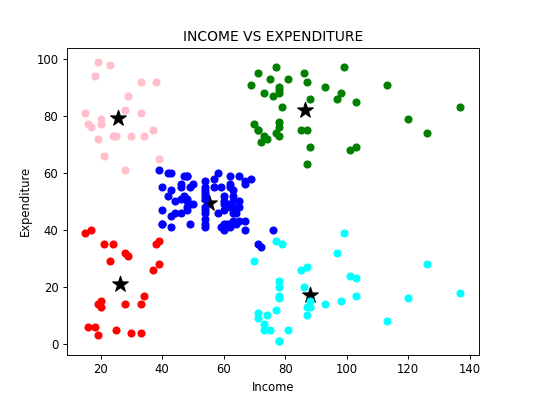

In [ ]:
plt.scatter(clusters[0][0], clusters[0][1], marker = '*', s = 200, color = 'black')
plt.scatter(clusters[1][0], clusters[1][1], marker = '*', s = 200, color = 'black')
plt.scatter(clusters[2][0], clusters[2][1], marker = '*', s = 200, color = 'black')
plt.scatter(clusters[3][0], clusters[3][1], marker = '*', s = 200, color = 'black')
plt.scatter(clusters[4][0], clusters[4][1], marker = '*', s = 200, color = 'black')

color = ['blue', 'green', 'cyan', 'red', 'pink']
for i in range(0,5):
  data = inc_spen[inc_spen['n'] == i]
  plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c = color[i])

plt.title('INCOME VS EXPENDITURE')
plt.xlabel('Income')
plt.ylabel('Expenditure')
plt.show()

Clustering can be seen in the above graph.

Note - Black Stars represent the centers of each cluster. 

# 2. Clustering between Age and Income

In [ ]:
inc_age = df.drop(['CustomerID',	'Gender',	'Spending Score (1-100)'], axis=1)
inc_age

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


Visualizing Age and Income

<IPython.core.display.Javascript object>


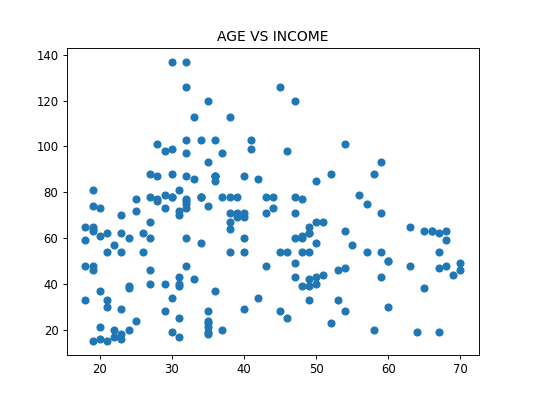

Text(0.5, 1.0, 'AGE VS INCOME')

In [ ]:
plt.scatter(df['Age'], df['Annual Income (k$)'])
plt.title('AGE VS INCOME')

Using Elbow method to get the optimal number of clusters.

## Elbow Method

In [ ]:
k_range = range(1,11)
sse = []
for k in k_range:
  kcluster = KMeans(n_clusters=k, init='k-means++', random_state=0)
  kcluster.fit(inc_age)
  sse.append(kcluster.inertia_)

SUM OF SQUARED ERRORS

In [ ]:
sse

[176108.77999999997,
 87121.56591478694,
 59486.961439280356,
 39529.887967363524,
 31968.53223665133,
 25399.022004416987,
 22434.369020258036,
 18941.94857400417,
 16369.673583314006,
 13783.078166411146]

In [ ]:
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('Sum of squared errors')
plt.plot(k_range, sse)

<IPython.core.display.Javascript object>

From the above graph it is clear that the optimal no. of clusters are 4

## Clustering

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)

In [ ]:
inc_age

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


Coordinates of centers of each cluster is stored in clusters variable

In [ ]:
kmeans.fit(inc_age)
clusters = kmeans.cluster_centers_
clusters

array([[ 39.        , 106.5       ],
       [ 55.81481481,  51.77777778],
       [ 30.34693878,  29.26530612],
       [ 31.95890411,  72.95890411]])

Predicted cluster number of every income and expenditure pair

In [ ]:
pred = kmeans.fit_predict(inc_age)
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3,
       3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

Adding cluster number into dataframe

In [ ]:
inc_age['n'] = pred
inc_age

,Age,Annual Income (k$),n
0,19,15,2
1,21,15,2
2,20,16,2
3,23,16,2
4,31,17,2
...,...,...,...
195,35,120,0
196,45,126,0
197,32,126,0
198,32,137,0


<IPython.core.display.Javascript object>


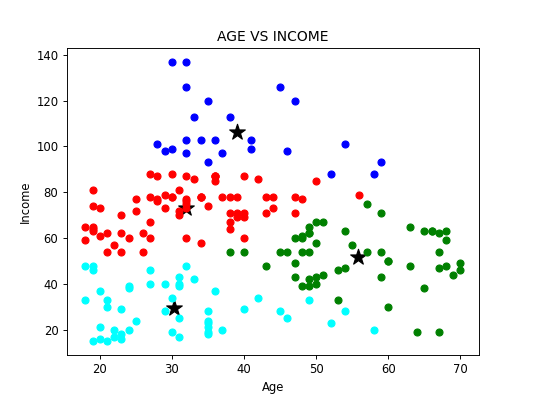

In [ ]:
plt.scatter(clusters[0][0], clusters[0][1], marker = '*', s = 200, color = 'black')
plt.scatter(clusters[1][0], clusters[1][1], marker = '*', s = 200, color = 'black')
plt.scatter(clusters[2][0], clusters[2][1], marker = '*', s = 200, color = 'black')
plt.scatter(clusters[3][0], clusters[3][1], marker = '*', s = 200, color = 'black')

color = ['blue', 'green', 'cyan', 'red']
for i in range(0,4):
  data = inc_age[inc_age['n'] == i]
  plt.scatter(data['Age'], data['Annual Income (k$)'], c = color[i])

plt.title('AGE VS INCOME')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

Clustering can be seen in the above graph.

Note - Black Stars represent the centers of each cluster.

# 3. Clustering between Age and Spending

In [ ]:
spen_age = df.drop(['CustomerID',	'Gender',	'Annual Income (k$)'], axis=1)
spen_age

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


Visualizing Age and Spending Score

<IPython.core.display.Javascript object>


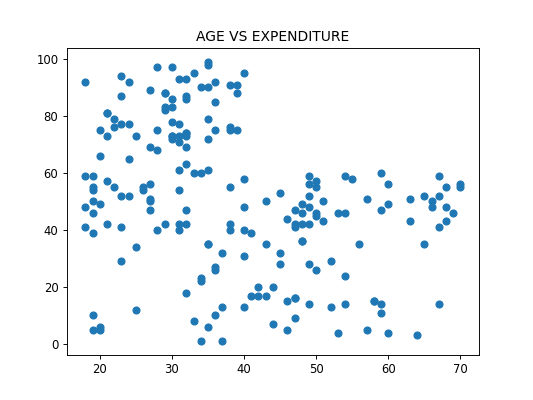

Text(0.5, 1.0, 'AGE VS EXPENDITURE')

In [ ]:
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.title('AGE VS EXPENDITURE')

Using Elbow method to get the optimal number of clusters.

## Elbow Method

In [ ]:
k_range = range(1,11)
sse = []
for k in k_range:
  kcluster = KMeans(n_clusters=k, init='k-means++', random_state=0)
  kcluster.fit(spen_age)
  sse.append(kcluster.inertia_)

SUM OF SQUARED ERRORS

In [ ]:
sse

[171535.50000000003,
 75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23830.24505228461,
 19502.407839362197,
 15523.684014328754,
 13020.084512948228,
 11517.231348351697,
 10299.6983592504]

<IPython.core.display.Javascript object>


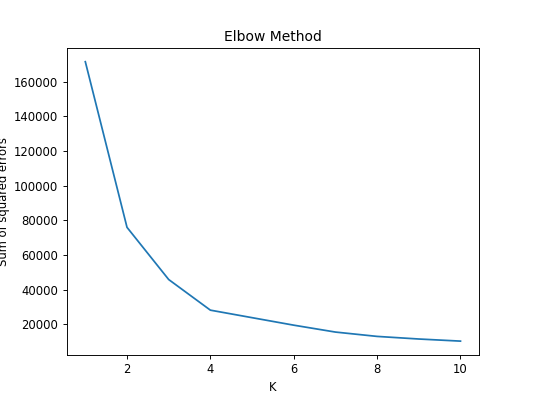

In [ ]:
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('Sum of squared errors')
plt.plot(k_range, sse)

From the above graph it is clear that the optimal no. of clusters are 4

## Clustering

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)

In [ ]:
spen_age

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


Coordinates of centers of each cluster is stored in clusters variable

In [ ]:
kmeans.fit(spen_age)
clusters = kmeans.cluster_centers_
clusters

array([[27.61702128, 49.14893617],
       [30.1754386 , 82.35087719],
       [43.29166667, 15.02083333],
       [55.70833333, 48.22916667]])

Predicted cluster number of every income and expenditure pair

In [ ]:
pred = kmeans.fit_predict(spen_age)
pred

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 0, 1,
       2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 3, 0,
       2, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 1, 0, 1, 3, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

Adding cluster number into dataframe

In [ ]:
spen_age['n'] = pred
spen_age

,Age,Spending Score (1-100),n
0,19,39,0
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,0
...,...,...,...
195,35,79,1
196,45,28,2
197,32,74,1
198,32,18,2


<IPython.core.display.Javascript object>


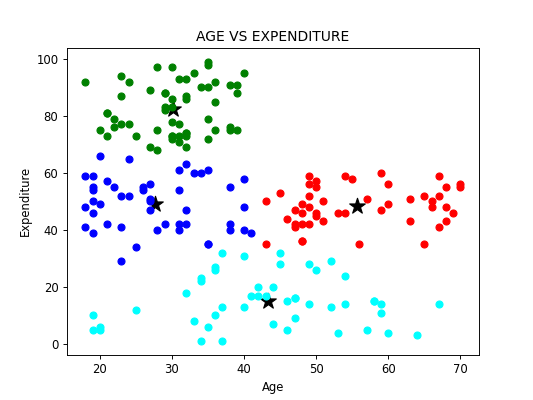

In [ ]:
plt.scatter(clusters[0][0], clusters[0][1], marker = '*', s = 200, color = 'black')
plt.scatter(clusters[1][0], clusters[1][1], marker = '*', s = 200, color = 'black')
plt.scatter(clusters[2][0], clusters[2][1], marker = '*', s = 200, color = 'black')
plt.scatter(clusters[3][0], clusters[3][1], marker = '*', s = 200, color = 'black')

color = ['blue', 'green', 'cyan', 'red']
for i in range(0,4):
  data = spen_age[spen_age['n'] == i]
  plt.scatter(data['Age'], data['Spending Score (1-100)'], c = color[i])

plt.title('AGE VS EXPENDITURE')
plt.xlabel('Age')
plt.ylabel('Expenditure')
plt.show()

Clustering can be seen in the above graph.

Note - Black Stars represent the centers of each cluster.

# 4. 3D Clustering

## Elbow Method

<IPython.core.display.Javascript object>


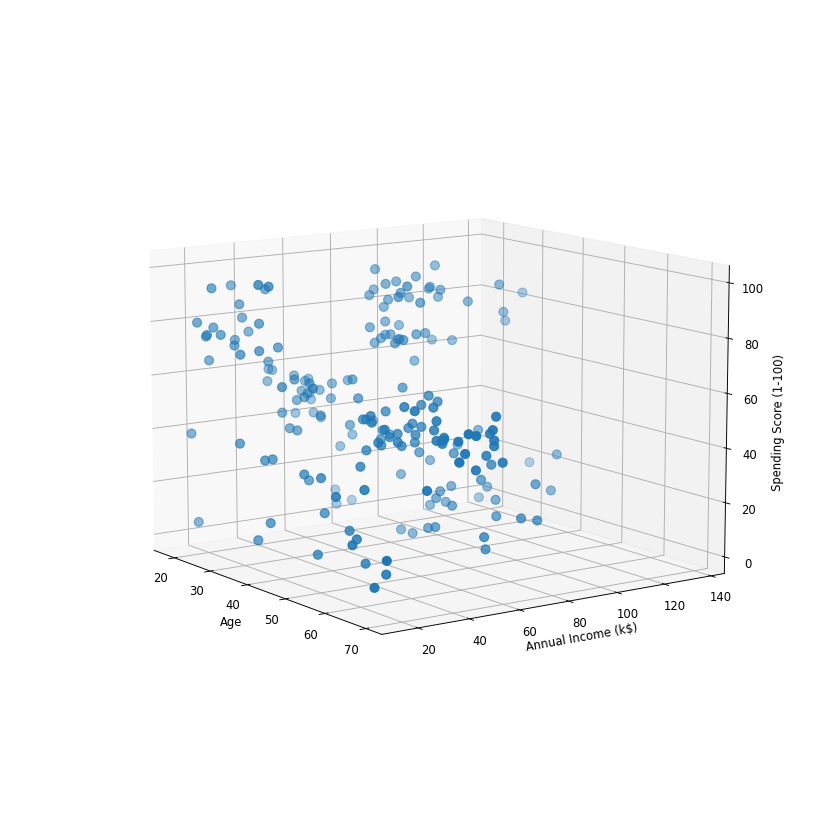

Text(0.5, 0, 'Spending Score (1-100)')

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df["Age"], df["Annual Income (k$)"], df["Spending Score (1-100)"], s=60)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')

In [ ]:
k_range = range(1,11)
sse = []
for k in k_range:
  kcluster = KMeans(n_clusters=k, init='k-means++', random_state=0)
  kcluster.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
  sse.append(kcluster.inertia_)

SUM OF SQUARED ERRORS

In [ ]:
sse

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37239.83554245604,
 30273.394312070028,
 25018.576334776328,
 21850.16528258562,
 19664.68519600554]

In [ ]:
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('Sum of squared errors')
plt.plot(k_range, sse)

<IPython.core.display.Javascript object>

From the above graph it is clear that the optimal no. of clusters are 5

## Clustering

In [ ]:
data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
data

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

Predicted cluster number of every income and expenditure pair

In [ ]:
pred = kmeans.fit_predict(data)
pred

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

Coordinates of centers of each cluster is stored in clusters variable

In [ ]:
clusters = kmeans.cluster_centers_
clusters

array([[45.2173913 , 26.30434783, 20.91304348],
       [43.08860759, 55.29113924, 49.56962025],
       [32.69230769, 86.53846154, 82.12820513],
       [40.66666667, 87.75      , 17.58333333],
       [25.52173913, 26.30434783, 78.56521739]])

Adding cluster number into dataframe

In [ ]:
data['n'] = pred
data

<ipython-input-54-b5ac16f9b8fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['n'] = pred


,Age,Annual Income (k$),Spending Score (1-100),n
0,19,15,39,0
1,21,15,81,4
2,20,16,6,0
3,23,16,77,4
4,31,17,40,0
...,...,...,...,...
195,35,120,79,2
196,45,126,28,3
197,32,126,74,2
198,32,137,18,3


In [ ]:
df = data

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(clusters[0][0], clusters[0][1], clusters[0][2], marker = '*', s = 200, color = 'black')
ax.scatter(clusters[1][0], clusters[1][1], clusters[1][2], marker = '*', s = 200, color = 'black')
ax.scatter(clusters[2][0], clusters[2][1], clusters[2][2], marker = '*', s = 200, color = 'black')
ax.scatter(clusters[3][0], clusters[3][1], clusters[3][2], marker = '*', s = 200, color = 'black')
ax.scatter(clusters[4][0], clusters[4][1], clusters[4][2], marker = '*', s = 200, color = 'black')


ax.scatter(df.Age[df.n == 0], df["Annual Income (k$)"][df.n == 0], df["Spending Score (1-100)"][df.n == 0], c='blue', s=60)
ax.scatter(df.Age[df.n == 1], df["Annual Income (k$)"][df.n == 1], df["Spending Score (1-100)"][df.n == 1], c='red', s=60)
ax.scatter(df.Age[df.n == 2], df["Annual Income (k$)"][df.n == 2], df["Spending Score (1-100)"][df.n == 2], c='green', s=60)
ax.scatter(df.Age[df.n == 3], df["Annual Income (k$)"][df.n == 3], df["Spending Score (1-100)"][df.n == 3], c='orange', s=60)
ax.scatter(df.Age[df.n == 4], df["Annual Income (k$)"][df.n == 4], df["Spending Score (1-100)"][df.n == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

<IPython.core.display.Javascript object>

Clustering can be seen in the above graph.

Note - Black Stars represent the centers of each cluster.

# Plot of Gender with Income and Spending Score

In [ ]:
df = pd.read_csv('C:\\Users\\Rohan Singh Chouhan\\Desktop\\Exposys\\customer-segmentation-dataset\\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<IPython.core.display.Javascript object>


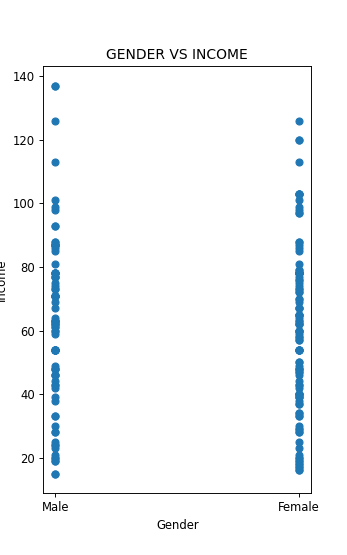

Text(0, 0.5, 'Income')

In [ ]:
plt.figure(figsize=(5,8))
plt.scatter(df['Gender'], df['Annual Income (k$)'])
plt.title('GENDER VS INCOME')
plt.xlabel('Gender')
plt.ylabel('Income')

<IPython.core.display.Javascript object>


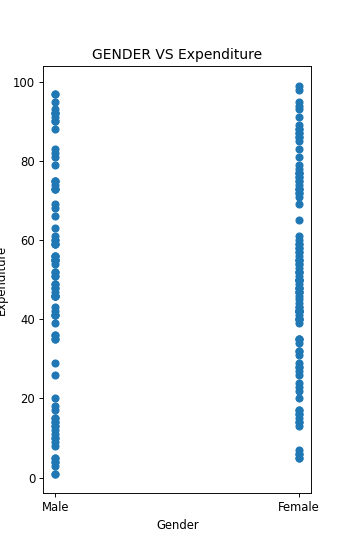

Text(0, 0.5, 'Expenditure')

In [ ]:
plt.figure(figsize=(5,8))
plt.scatter(df['Gender'], df['Spending Score (1-100)'])
plt.title('GENDER VS Expenditure')
plt.xlabel('Gender')
plt.ylabel('Expenditure')